In [2]:
#Step 1
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import requests
import json
import datetime
import requests
import pandas as pd

In [3]:
#Step 2
# Define the API URL
url = "https://api.coinmarketcap.com/data-api/v3/cryptocurrency/historical?id=1027&convertId=2781&timeStart=1672531200&timeEnd=1704067199"

# Send the API request and get the response
response = requests.get(url)

# Parse the JSON response and extract the Ethereum data
data = response.json()["data"]["quotes"]

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Convert the timestamp column to datetime format
df["timeClose"] = pd.to_datetime(df["timeClose"])

# Set the timestamp column as the DataFrame index
df.set_index("timeClose", inplace=True)
df.to_csv('Ethereum Historical Data.csv')

# Print the DataFrame
print(df)



                                                  timeOpen  \
timeClose                                                    
2023-01-01 23:59:59.999000+00:00  2023-01-01T00:00:00.000Z   
2023-01-02 23:59:59.999000+00:00  2023-01-02T00:00:00.000Z   
2023-01-03 23:59:59.999000+00:00  2023-01-03T00:00:00.000Z   
2023-01-04 23:59:59.999000+00:00  2023-01-04T00:00:00.000Z   
2023-01-05 23:59:59.999000+00:00  2023-01-05T00:00:00.000Z   
...                                                    ...   
2023-03-07 23:59:59.999000+00:00  2023-03-07T00:00:00.000Z   
2023-03-08 23:59:59.999000+00:00  2023-03-08T00:00:00.000Z   
2023-03-09 23:59:59.999000+00:00  2023-03-09T00:00:00.000Z   
2023-03-10 23:59:59.999000+00:00  2023-03-10T00:00:00.000Z   
2023-03-11 23:59:59.999000+00:00  2023-03-11T00:00:00.000Z   

                                                  timeHigh  \
timeClose                                                    
2023-01-01 23:59:59.999000+00:00  2023-01-01T20:37:00.000Z   
2023-01

In [4]:
print(df.columns)

Index(['timeOpen', 'timeHigh', 'timeLow', 'quote'], dtype='object')


In [5]:
#Step 3
# Load the data into a DataFrame
df = pd.read_csv('Ethereum Historical Data.csv')

In [6]:
#Step 4
# Replace single quotes with double quotes in the "quote" column
df['quote'] = df['quote'].str.replace("'", '"')


In [7]:
# Parse the JSON column into a dictionary
df["quote"] = df["quote"].apply(json.loads)

In [8]:
#Step 5
# Extract the values for each key as separate columns
df['open'] = df['quote'].apply(lambda x: x['open'])
df['high'] = df['quote'].apply(lambda x: x['high'])
df['low'] = df['quote'].apply(lambda x: x['low'])
df['close'] = df['quote'].apply(lambda x: x['close'])


In [9]:
# Drop the original JSON column
df.drop('quote', axis=1, inplace=True)

In [10]:
#Step 6
# Convert timeClose, timeOpen, timeHigh, and timeLow columns to datetime objects
df['timeClose'] = pd.to_datetime(df['timeClose'])
df['timeOpen'] = pd.to_datetime(df['timeOpen'])
df['timeHigh'] = pd.to_datetime(df['timeHigh'])
df['timeLow'] = pd.to_datetime(df['timeLow'])

In [11]:
# Print the DataFrame
print(df)

                          timeClose                  timeOpen  \
0  2023-01-01 23:59:59.999000+00:00 2023-01-01 00:00:00+00:00   
1  2023-01-02 23:59:59.999000+00:00 2023-01-02 00:00:00+00:00   
2  2023-01-03 23:59:59.999000+00:00 2023-01-03 00:00:00+00:00   
3  2023-01-04 23:59:59.999000+00:00 2023-01-04 00:00:00+00:00   
4  2023-01-05 23:59:59.999000+00:00 2023-01-05 00:00:00+00:00   
..                              ...                       ...   
65 2023-03-07 23:59:59.999000+00:00 2023-03-07 00:00:00+00:00   
66 2023-03-08 23:59:59.999000+00:00 2023-03-08 00:00:00+00:00   
67 2023-03-09 23:59:59.999000+00:00 2023-03-09 00:00:00+00:00   
68 2023-03-10 23:59:59.999000+00:00 2023-03-10 00:00:00+00:00   
69 2023-03-11 23:59:59.999000+00:00 2023-03-11 00:00:00+00:00   

                    timeHigh                   timeLow         open  \
0  2023-01-01 20:37:00+00:00 2023-01-01 04:51:00+00:00  1196.713671   
1  2023-01-02 15:46:00+00:00 2023-01-02 01:24:00+00:00  1201.103310   
2  202

In [12]:
df.describe()

,open,high,low,close
count,70.000000,70.000000,70.000000,70.000000
mean,1538.625204,1567.743029,1512.801374,1542.708245
std,140.751019,142.528134,132.697816,134.687310
min,1196.713671,1203.475387,1192.885436,1200.964832
25%,1514.923274,1544.469888,1476.816593,1514.910281
50%,1570.953801,1612.933000,1552.094197,1570.801348
75%,1641.215380,1663.219171,1610.465044,1641.548809
max,1702.797795,1732.801098,1683.670144,1702.675116


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeClose  70 non-null     datetime64[ns, UTC]
 1   timeOpen   70 non-null     datetime64[ns, UTC]
 2   timeHigh   70 non-null     datetime64[ns, UTC]
 3   timeLow    70 non-null     datetime64[ns, UTC]
 4   open       70 non-null     float64            
 5   high       70 non-null     float64            
 6   low        70 non-null     float64            
 7   close      70 non-null     float64            
dtypes: datetime64[ns, UTC](4), float64(4)
memory usage: 4.5 KB


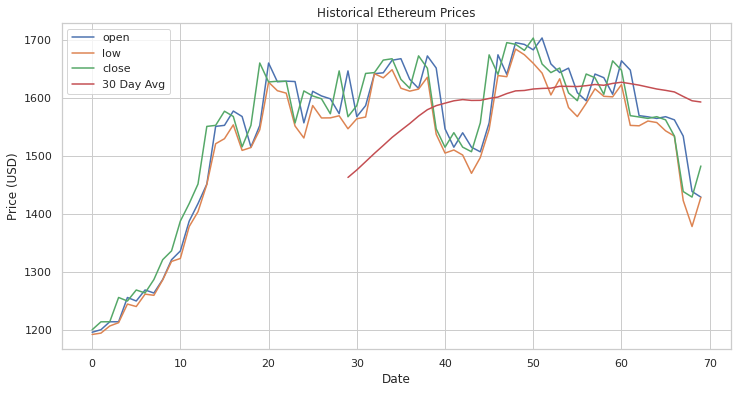

In [14]:
#Step 7
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('whitegrid')

df[['open', 'low', 'close']].plot(figsize=(12,6),label=['Open', 'Low', 'Close'])
df['close'].rolling(window=30).mean().plot(label='30 Day Avg')

plt.title('Historical Ethereum Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.legend()
plt.show()


In [15]:
df = df[['open','high','low','close']]
df.head()


,open,high,low,close
0,1196.713671,1203.475387,1192.885436,1200.964832
1,1201.103310,1219.860649,1195.215023,1214.656676
2,1214.744040,1219.095373,1207.491547,1214.778803
3,1214.718573,1264.807450,1213.168826,1256.526595
4,1256.484593,1258.571559,1245.173056,1250.438551


In [16]:
X = df[['open','high','low']]
y= df[['close']]

In [17]:
y

,close
0,1200.964832
1,1214.656676
2,1214.778803
3,1256.526595
4,1250.438551
...,...
65,1561.933120
66,1534.088232
67,1438.660722
68,1429.158133


In [18]:
#Step 8
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X)

In [19]:
X_scaled

array([[0.        , 0.        , 0.        ],
       [0.00867373, 0.03095497, 0.00474666],
       [0.03562722, 0.02950921, 0.02976073],
       [0.0355769 , 0.11586829, 0.04132849],
       [0.11810472, 0.10408747, 0.10653881],
       [0.10619846, 0.13176187, 0.09792895],
       [0.143664  , 0.12680836, 0.14137702],
       [0.1333143 , 0.15847342, 0.13721157],
       [0.17929257, 0.2619725 , 0.19111294],
       [0.24636572, 0.26313054, 0.25600178],
       [0.27618552, 0.34847602, 0.26630339],
       [0.37748513, 0.43225909, 0.37804092],
       [0.4371458 , 0.48778532, 0.43020585],
       [0.50330532, 0.68060875, 0.52589863],
       [0.69952372, 0.66778435, 0.66833456],
       [0.70305621, 0.73785266, 0.68602017],
       [0.75164144, 0.73777948, 0.734437  ],
       [0.73305061, 0.75309265, 0.64496196],
       [0.62941302, 0.66971053, 0.65506241],
       [0.70276862, 0.8622487 , 0.71728476],
       [0.91485264, 0.88925187, 0.88415044],
       [0.85095009, 0.8587303 , 0.85414287],
       [0.

In [20]:
X_scaled.shape

(70, 3)

In [21]:
y.shape

(70, 1)

In [22]:
y_scaled= scaler.fit_transform(y)
y_scaled

array([[0.        ],
       [0.02729034],
       [0.02753376],
       [0.11074472],
       [0.09861014],
       [0.13636191],
       [0.12617941],
       [0.1722002 ],
       [0.24032618],
       [0.27031792],
       [0.37266103],
       [0.4324681 ],
       [0.49959113],
       [0.69709959],
       [0.70063273],
       [0.74917475],
       [0.73126111],
       [0.62693986],
       [0.70078636],
       [0.91445063],
       [0.84940134],
       [0.85192037],
       [0.85165926],
       [0.70885413],
       [0.81869203],
       [0.80154048],
       [0.79167539],
       [0.74040781],
       [0.88734628],
       [0.73022551],
       [0.76851234],
       [0.87865024],
       [0.88153815],
       [0.92439953],
       [0.92901106],
       [0.85842579],
       [0.82773327],
       [0.93886602],
       [0.89643752],
       [0.68859154],
       [0.62566849],
       [0.67561289],
       [0.62599645],
       [0.61031456],
       [0.70939411],
       [0.94233904],
       [0.87521181],
       [0.984

In [23]:
#Step 9
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y_scaled,test_size = 0.25)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
#Step10
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.0012496777223711705


In [26]:
predictedprice = model.predict(X)
predictedprice

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[1208.94008329],
       [1223.61674138],
       [1222.11476302],
       [1271.51635198],
       [1258.82799426],
       [1274.50973667],
       [1274.12891831],
       [1292.97072901],
       [1349.89569381],
       [1349.62673302],
       [1386.83881667],
       [1434.36925158],
       [1460.48972197],
       [1572.08023833],
       [1545.12428606],
       [1586.97004402],
       [1586.82767963],
       [1568.34484233],
       [1567.4287855 ],
       [1663.66772161],
       [1660.67965425],
       [1657.47469273],
       [1636.84763868],
       [1592.86473792],
       [1622.38561194],
       [1618.74904126],
       [1599.34561019],
       [1591.00154834],
       [1660.92901629],
       [1582.55005229],
       [1606.42005392],
       [1640.18354851],
       [1715.14743844],
       [1675.32351181],
       [1689.12166848],
       [1644.84903545],
       [1649.47752253],
       [1683.543291  ],
       [1672.23019487],
       [1580.14190884],
       [1532.38331769],
       [1548.035

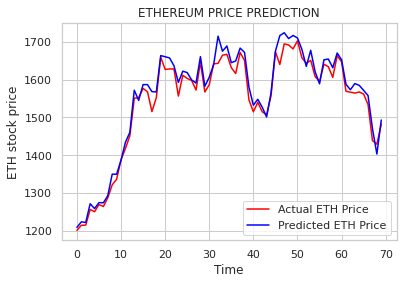

In [27]:
#Step11
#visualizing the results
plt.plot(y,color = 'red', label = 'Actual ETH Price')
plt.plot(predictedprice, color = 'blue', label = 'Predicted ETH Price')
plt.title('ETHEREUM PRICE PREDICTION')
plt.xlabel('Time')
plt.ylabel('ETH stock price')
plt.legend()
plt.show()